In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
data_set = pd.read_csv('set_1.csv')

In [4]:
num_set = []
for value in data_set:
    #value_mod = value.replace('.', '', 2) #Для третьего сета
    num_set.append(float(value))


In [5]:
max_value = max(num_set)
min_value = min(num_set)
print(f"Максимальное значение случайной величины: {max_value}")
print(f"Минимальное значение случайной величины: {min_value}")

Максимальное значение случайной величины: 66.0
Минимальное значение случайной величины: 1.0


In [6]:
num_of_intervals = 20

intervals = []
step = (max_value-min_value)/num_of_intervals
interval_start = min_value

for i in range(0, num_of_intervals):
    interval = [interval_start, interval_start + step]
    intervals.append(interval)
    interval_start += step 
    
print(f"Интервалы, которые выбраны для сглаживания: {intervals}")

Интервалы, которые выбраны для сглаживания: [[1.0, 4.25], [4.25, 7.5], [7.5, 10.75], [10.75, 14.0], [14.0, 17.25], [17.25, 20.5], [20.5, 23.75], [23.75, 27.0], [27.0, 30.25], [30.25, 33.5], [33.5, 36.75], [36.75, 40.0], [40.0, 43.25], [43.25, 46.5], [46.5, 49.75], [49.75, 53.0], [53.0, 56.25], [56.25, 59.5], [59.5, 62.75], [62.75, 66.0]]


In [7]:
interval_count = [0 for i in range(0, num_of_intervals)]

for i in num_set:
    for j in range(0, num_of_intervals):
        if i < intervals[j][1] and i >= intervals[j][0]:
            interval_count[j] += 1
            
for i in range(0, num_of_intervals):
    interval_count[i] = interval_count[i]/len(num_set)
print(f"Вероятности попадания элементов на интервалы: {interval_count}")            

Вероятности попадания элементов на интервалы: [0.67207, 0.23454, 0.05776, 0.02273, 0.00692, 0.00232, 0.00052, 0.0002, 0.00169, 0.00087, 0.00026, 7e-05, 1e-05, 2e-05, 1e-05, 0.0, 0.0, 0.0, 0.0, 0.0]


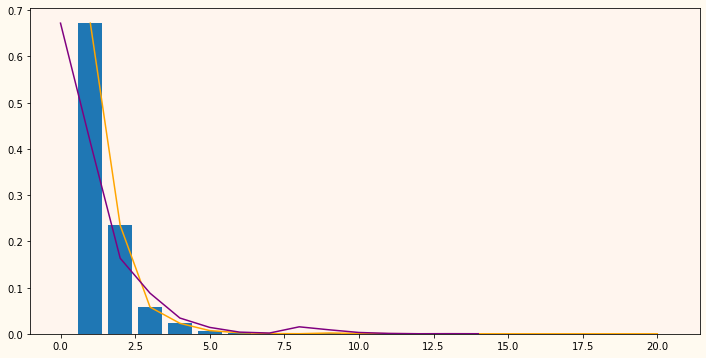

In [8]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = [i for i in range (1, num_of_intervals + 1)]
y = interval_count

fig = plt.figure()                      #гистограмма
ax_core = fig.add_subplot()
ax_core.bar(x, y)
ax_core.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    
fig.set_figheight(6)

plt.plot(x, y, color="orange")          #график распределения гистограммы
                               
plist = stats.geom.cdf(x, y)            #геометрическое распределение
plt.plot(plist, color="purple")
plt.show()


In [9]:
#Выдвигаем предположение, что случайная величина имеет геометрическое распределение.

In [10]:
#Критерий Пирсона

x_empirical = interval_count
x_theoretical = stats.geom.cdf(x, y)

сhi_squared = 0

for i in range(0, 20):
    if x_empirical[i] != 0:
        сhi_squared += (x_theoretical[i] - x_empirical[i])**2/x_theoretical[i]
    
сhi_squared *= len(num_set)
print(f"Хи-квадрат: {сhi_squared}")

Хи-квадрат: 25212.754956830264


In [11]:
#При данных степенях свободы 19 и альфа 0.01 значение хи-квадрата должно быть менее 37.6

#Полученный хи-квадрат несоизмеримо больше, что говорит о том, что различие с теоретическим вызвано неслучайным явлением

In [12]:
#Несмещенную состоятельную оценку мат ожидания

gen_avg = 0
for i in num_set:
    gen_avg += i

gen_avg /= len(num_set)
print(f"Несмещенная состоятельная оценка мат ожидания: {gen_avg}")

Несмещенная состоятельная оценка мат ожидания: 3.815513392400001


In [13]:
#Найдем смещенную состоятельную оценку дисперсии

gen_dispersion = 0
for i in num_set:
    gen_dispersion += (i - gen_avg)**2

gen_dispersion /= len(num_set)
gen_dispersion = np.sqrt(gen_dispersion) 

print(f"Смещенная состоятельная оценка дисперсии: {gen_dispersion}")

Смещенная состоятельная оценка дисперсии: 3.199184942559052


In [14]:
#Найдем несмещенную состоятельную оценку дисперсии

point_dispersion = 0
for i in num_set:
    point_dispersion += (i - gen_avg)**2
    
point_dispersion /= len(num_set) - 1
point_dispersion = np.sqrt(point_dispersion) 

print(f"Несмещенная состоятельняа оценка дисперсии: {point_dispersion}")

Несмещенная состоятельняа оценка дисперсии: 3.199200938603735


In [15]:
#Найдем среднее квадратичное отклонение

avg_sq = np.sqrt(point_dispersion)
print(f"Cреднее квадратичное отклонение: {avg_sq}")

Cреднее квадратичное отклонение: 1.7886310236054095


In [16]:
#Имеем n = 100000 и доверительную вероятность 0.95 получаем следующее значение распределения Стьюдента

t = 1.9599877077718446

delta = point_dispersion*t/np.sqrt(len(num_set) - 1)
print(f"Дельта: {delta}")

Дельта: 0.0198288276375747


In [17]:
#Тогда доверительный интервал для мат ожидания

x_1 = gen_avg - delta
x_2 = gen_avg + delta

print(f"{x_1} <= m_x < {x_2}")

3.795684564762426 <= m_x < 3.835342220037576


In [18]:
#Найдем доверительный интервал для дисперсии

#Хи-квадрат для вероятности (1 - 0.95)/2 и степени свободы 10000 - 1
chi_1 = 9723.732237

#Хи-квадрат для вероятности (1 + 0.95)/ и степени свободы 10000 - 1
chi_2 = 10278.05632

print(f"{len(num_set)*point_dispersion**2/chi_1} <= D_x < {len(num_set)*point_dispersion**2/chi_2}")

105.25677174262381 <= D_x < 99.57998211828264
